In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
weight = 0.5
input = 0.5

step_amount = 0.001

goal_prediction = 0.8
error_dict = {}
for iteration in range(1101):
    prediction = input * weight
    error = (prediction - goal_prediction) ** 2
    error_dict[iteration] = error

    print("Error: " + str(error) + " Prediction: " + str(prediction))

    up_prediction = input * (weight + step_amount)
    up_error = (goal_prediction - up_prediction) ** 2

    down_prediction = input * (weight - step_amount)
    down_error = (goal_prediction - down_prediction) ** 2

    if(down_error < up_error):
        weight = weight - step_amount

    if(down_error > up_error):
        weight = weight + step_amount

erro_df = pd.DataFrame.from_dict(error_dict, orient='index')
erro_df.columns = ['error']



Error: 0.30250000000000005 Prediction: 0.25
Error: 0.3019502500000001 Prediction: 0.2505
Error: 0.30140100000000003 Prediction: 0.251
Error: 0.30085225 Prediction: 0.2515
Error: 0.30030400000000007 Prediction: 0.252
Error: 0.2997562500000001 Prediction: 0.2525
Error: 0.29920900000000006 Prediction: 0.253
Error: 0.29866224999999996 Prediction: 0.2535
Error: 0.29811600000000005 Prediction: 0.254
Error: 0.2975702500000001 Prediction: 0.2545
Error: 0.29702500000000004 Prediction: 0.255
Error: 0.29648025 Prediction: 0.2555
Error: 0.29593600000000003 Prediction: 0.256
Error: 0.2953922500000001 Prediction: 0.2565
Error: 0.294849 Prediction: 0.257
Error: 0.29430625 Prediction: 0.2575
Error: 0.293764 Prediction: 0.258
Error: 0.2932222500000001 Prediction: 0.2585
Error: 0.292681 Prediction: 0.259
Error: 0.29214025 Prediction: 0.2595
Error: 0.2916 Prediction: 0.26
Error: 0.2910602500000001 Prediction: 0.2605
Error: 0.29052100000000003 Prediction: 0.261
Error: 0.28998225 Prediction: 0.2615
Error: 

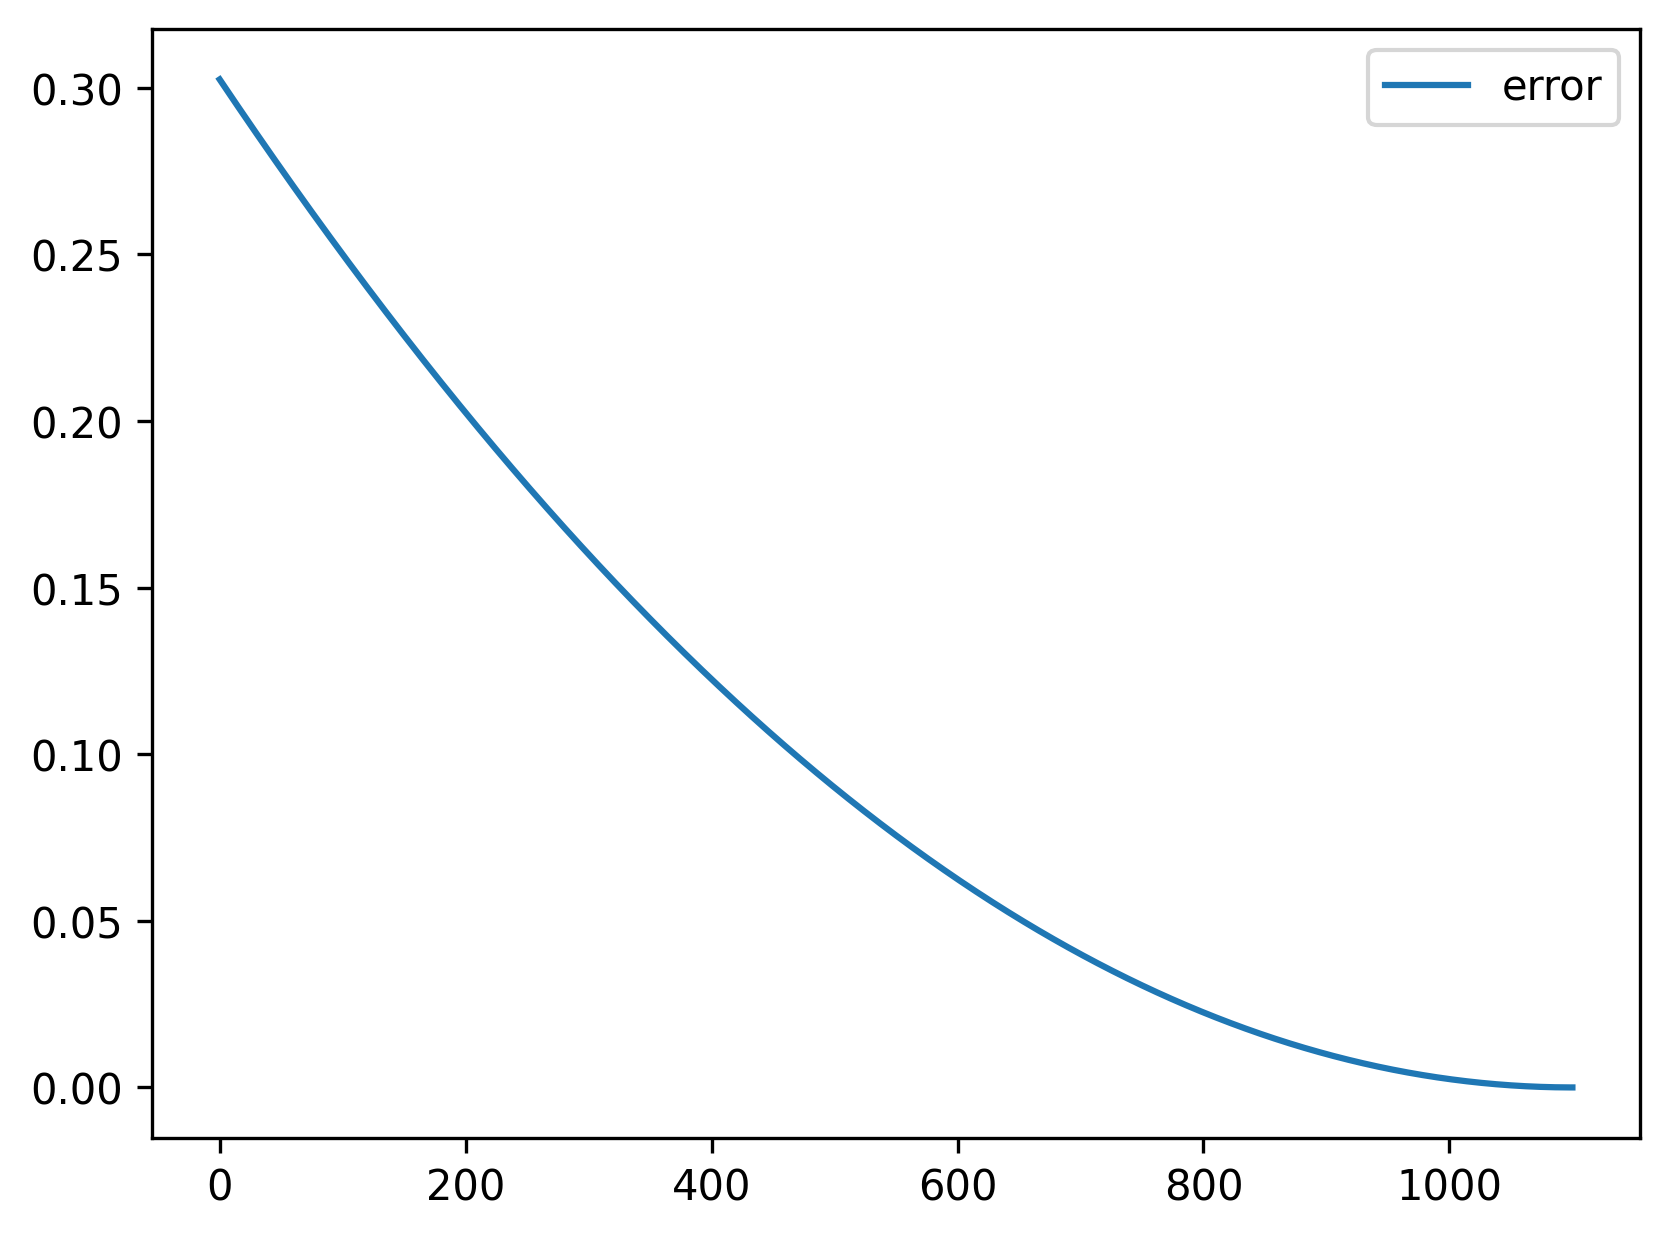

In [3]:
ax, fig = plt.subplots(dpi=300)
erro_df.plot(ax=fig)
plt.show()

## grad boosting

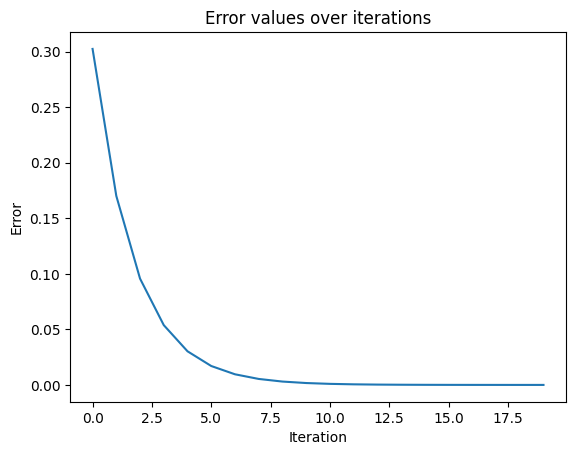

In [4]:
import matplotlib.pyplot as plt

# Your existing code
weight = 0.5
goal_pred = 0.8
input_value = 0.5
error_dict = {}

for iteration in range(20):
    pred = input_value * weight
    error = (pred - goal_pred) ** 2
    direction_and_amount = (pred - goal_pred) * input_value
    weight = weight - direction_and_amount
    error_dict[iteration] = error

# Plotting the error values
iterations = list(error_dict.keys())
errors = list(error_dict.values())

plt.plot(iterations, errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error values over iterations')
plt.show()


Объединяем в коде

-----
Weight:0.0
Error:0.6400000000000001 Prediction:0.0
Delta:-0.8 Weight Delta:-0.8800000000000001
-----
Weight:0.8800000000000001
Error:0.02822400000000005 Prediction:0.9680000000000002
Delta:0.16800000000000015 Weight Delta:0.1848000000000002
-----
Weight:0.6951999999999999
Error:0.0012446784000000064 Prediction:0.76472
Delta:-0.03528000000000009 Weight Delta:-0.0388080000000001
-----
Weight:0.734008
Error:5.4890317439999896e-05 Prediction:0.8074088
Delta:0.007408799999999993 Weight Delta:0.008149679999999992


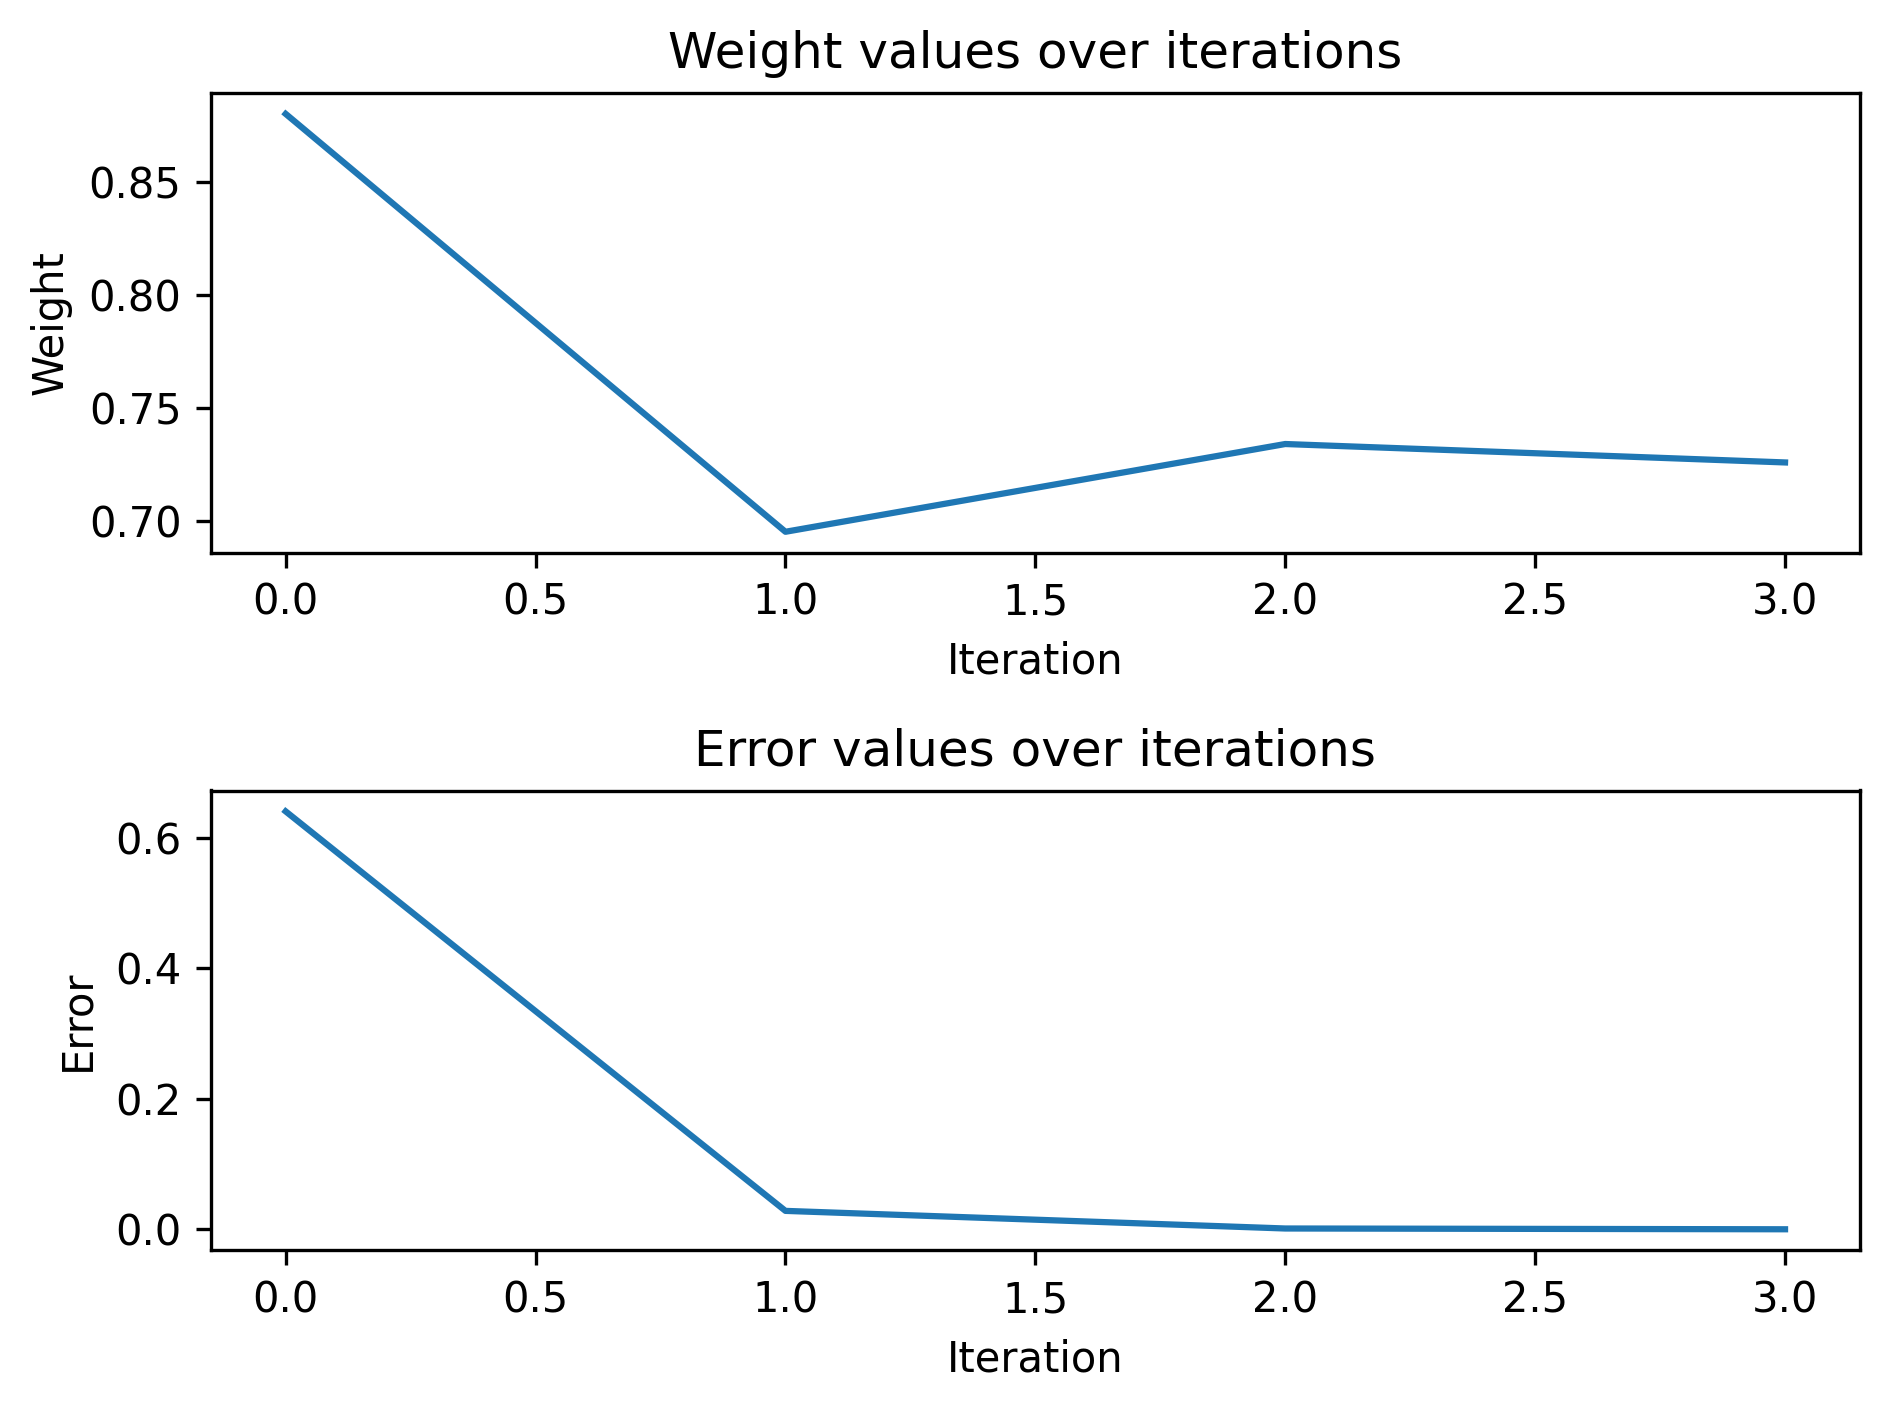

In [5]:
weight, goal_pred, input_value = (0.0, 0.8, 1.1)
weights = []
errors = []
for iteration in range(4):
    print("-----\nWeight:" + str(weight))
    pred = input_value * weight
    error = (pred - goal_pred) ** 2
    delta = pred - goal_pred
    weight_delta = delta * input_value
    weight = weight - weight_delta
    weights.append(weight)
    errors.append(error)
    print("Error:" + str(error) + " Prediction:" + str(pred))
    print("Delta:" + str(delta) + " Weight Delta:" + str(weight_delta))

# plot delta vs iteration in upper subplot
# plot error vs iteration in lower subplot
fig, (ax1, ax2) = plt.subplots(2, 1, dpi=300)
ax1.plot(weights)
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Weight')
ax1.set_title('Weight values over iterations')
ax2.plot(errors)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Error')
ax2.set_title('Error values over iterations')
plt.tight_layout()
plt.show()


## Ломаем градиеентный спуск

Error:0.48999999999999994 Prediction:1.5
Error:0.0049000000000000085 Prediction:0.8700000000000001
Error:4.9000000000000087e-05 Prediction:0.807
Error:4.900000000000475e-07 Prediction:0.8007000000000001
Error:4.900000000002029e-09 Prediction:0.8000700000000001
Error:4.9000000001263743e-11 Prediction:0.8000070000000001
Error:4.900000001058961e-13 Prediction:0.8000007000000001
Error:4.900000002613274e-15 Prediction:0.8000000700000001
Error:4.9000000336995186e-17 Prediction:0.8000000070000001
Error:4.900000810855669e-19 Prediction:0.8000000007000001
Error:4.900000810855669e-21 Prediction:0.80000000007
Error:4.8999386385583614e-23 Prediction:0.800000000007
Error:4.901493064320196e-25 Prediction:0.8000000000007002
Error:4.892170207534681e-27 Prediction:0.80000000000007
Error:4.738095811983702e-29 Prediction:0.8000000000000069
Error:6.039716305598372e-31 Prediction:0.8000000000000008
Error:1.232595164407831e-32 Prediction:0.8000000000000002
Error:0.0 Prediction:0.8
Error:0.0 Prediction:0.8
E

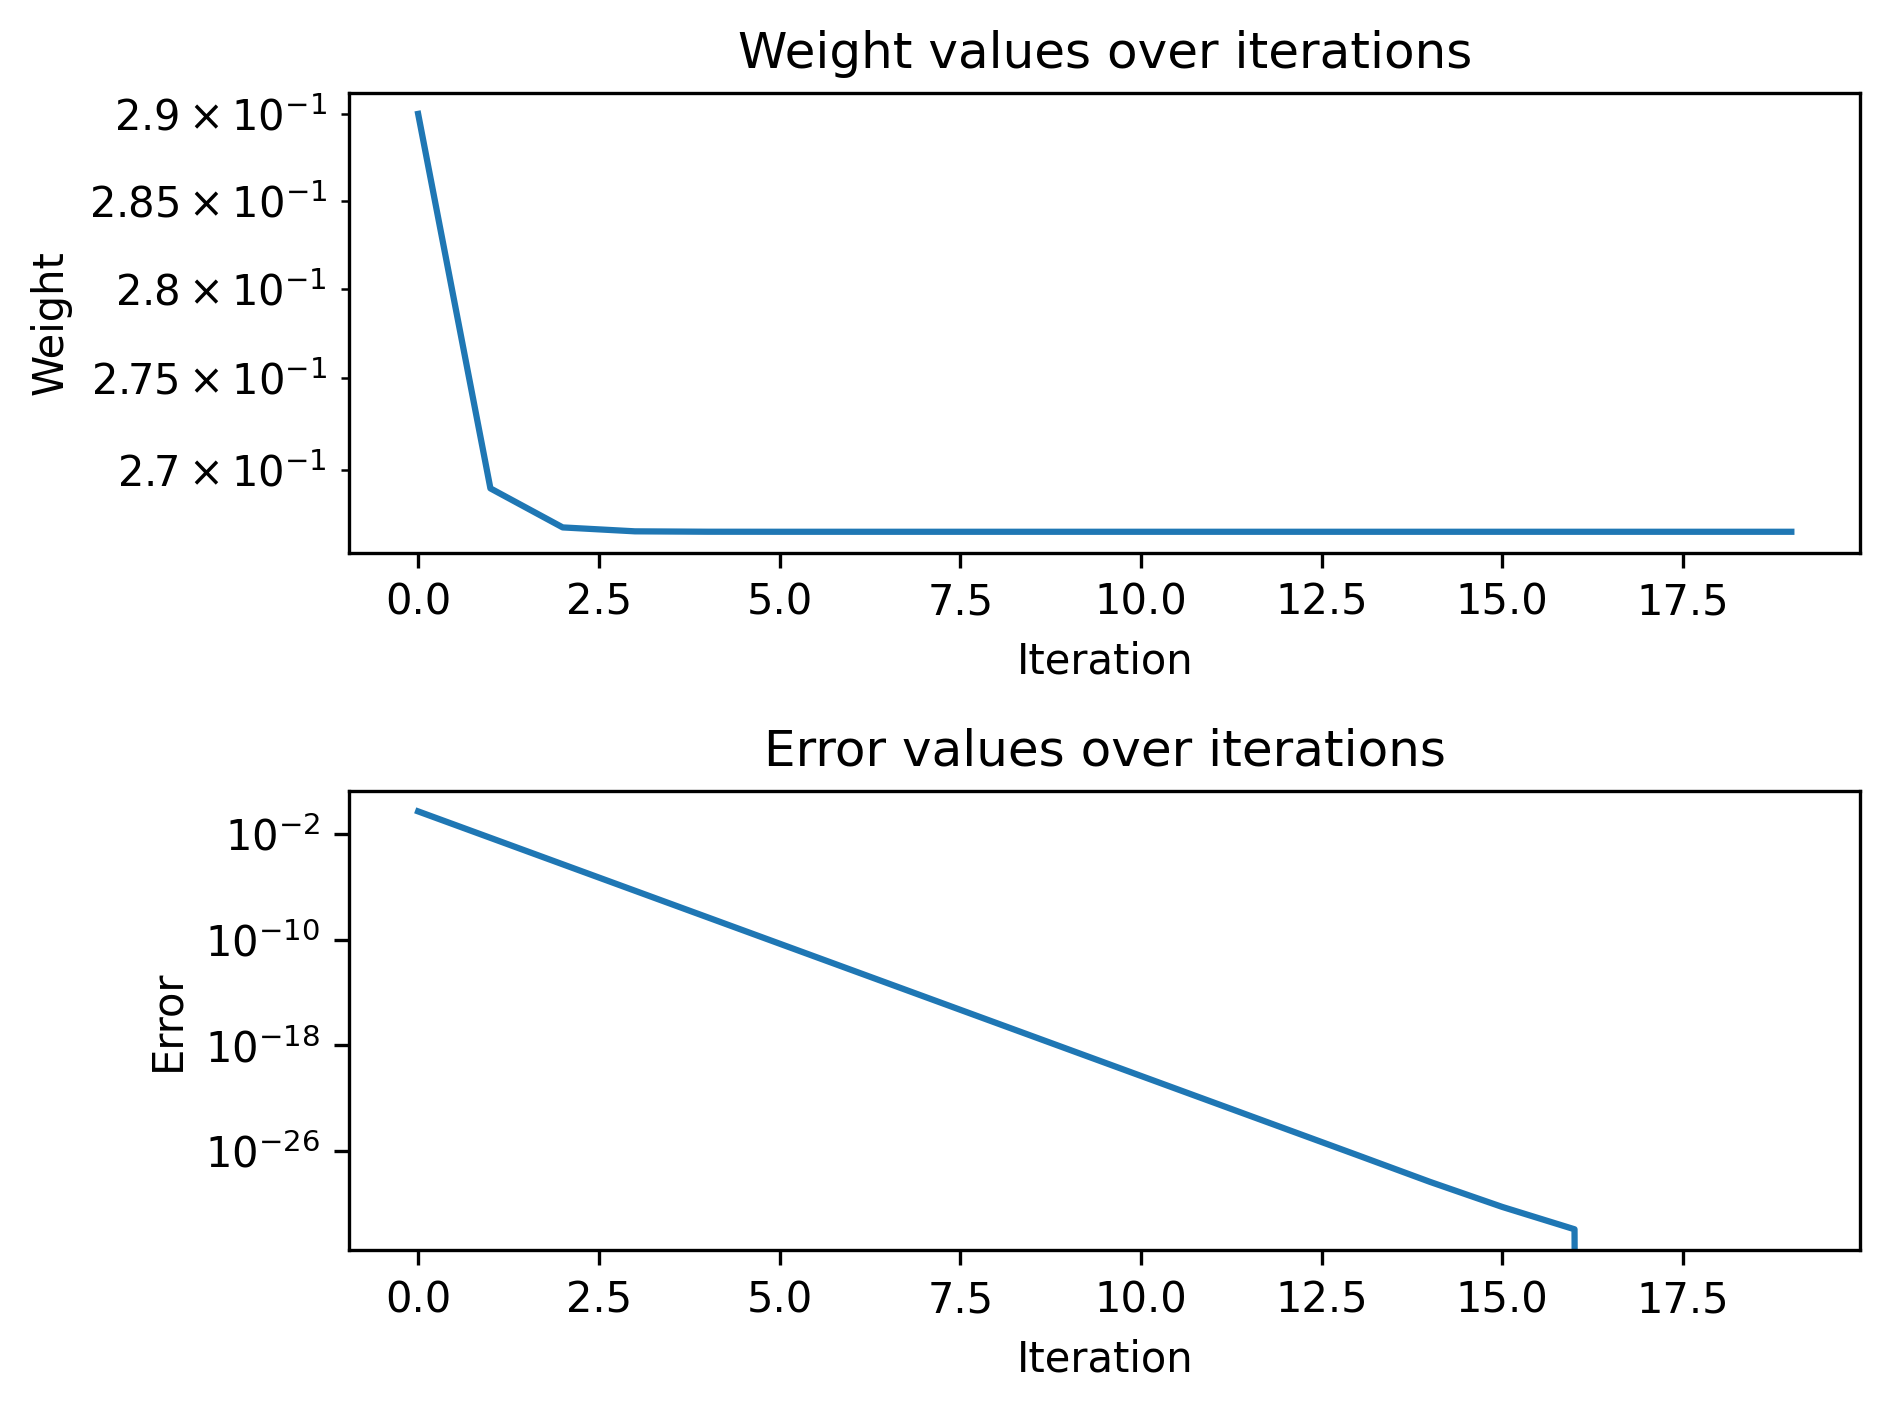

In [6]:
weight, goal_pred, input_value = (0.5, 0.8, 3)
alpha = 0.1
weights = []
errors = []
for iteration in range(20):
    pred = input_value * weight
    error = (pred - goal_pred) ** 2
    derivative = input_value * (pred - goal_pred)
    weight = weight - (alpha * derivative)
    
    print("Error:" + str(error) + " Prediction:" + str(pred))

    weights.append(weight)
    errors.append(error)

# plot delta vs iteration in upper subplot
# plot error vs iteration in lower subplot
fig, (ax1, ax2) = plt.subplots(2, 1, dpi=300)
# log scale for y-axis
ax1.set_yscale('log')
ax1.plot(weights)
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Weight')
ax1.set_title('Weight values over iterations')
ax2.set_yscale('log')
ax2.plot(errors)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Error')
ax2.set_title('Error values over iterations')
plt.tight_layout()
plt.show()

error is 0.48999999999999994 and weight is 0.5
error is 0.0049000000000000085 and weight is 0.29000000000000004
error is 4.9000000000000087e-05 and weight is 0.269
error is 4.900000000000475e-07 and weight is 0.2669
error is 4.900000000002029e-09 and weight is 0.26669000000000004
error is 4.9000000001263743e-11 and weight is 0.26666900000000004
error is 4.900000001058961e-13 and weight is 0.26666690000000004
error is 4.900000002613274e-15 and weight is 0.26666669000000004
error is 4.9000000336995186e-17 and weight is 0.266666669
error is 4.900000810855669e-19 and weight is 0.2666666669
error is 4.900000810855669e-21 and weight is 0.26666666669
error is 4.8999386385583614e-23 and weight is 0.266666666669
error is 4.901493064320196e-25 and weight is 0.26666666666690003
error is 4.892170207534681e-27 and weight is 0.26666666666669
error is 4.738095811983702e-29 and weight is 0.266666666666669
error is 6.039716305598372e-31 and weight is 0.26666666666666694
error is 1.232595164407831e-32 a

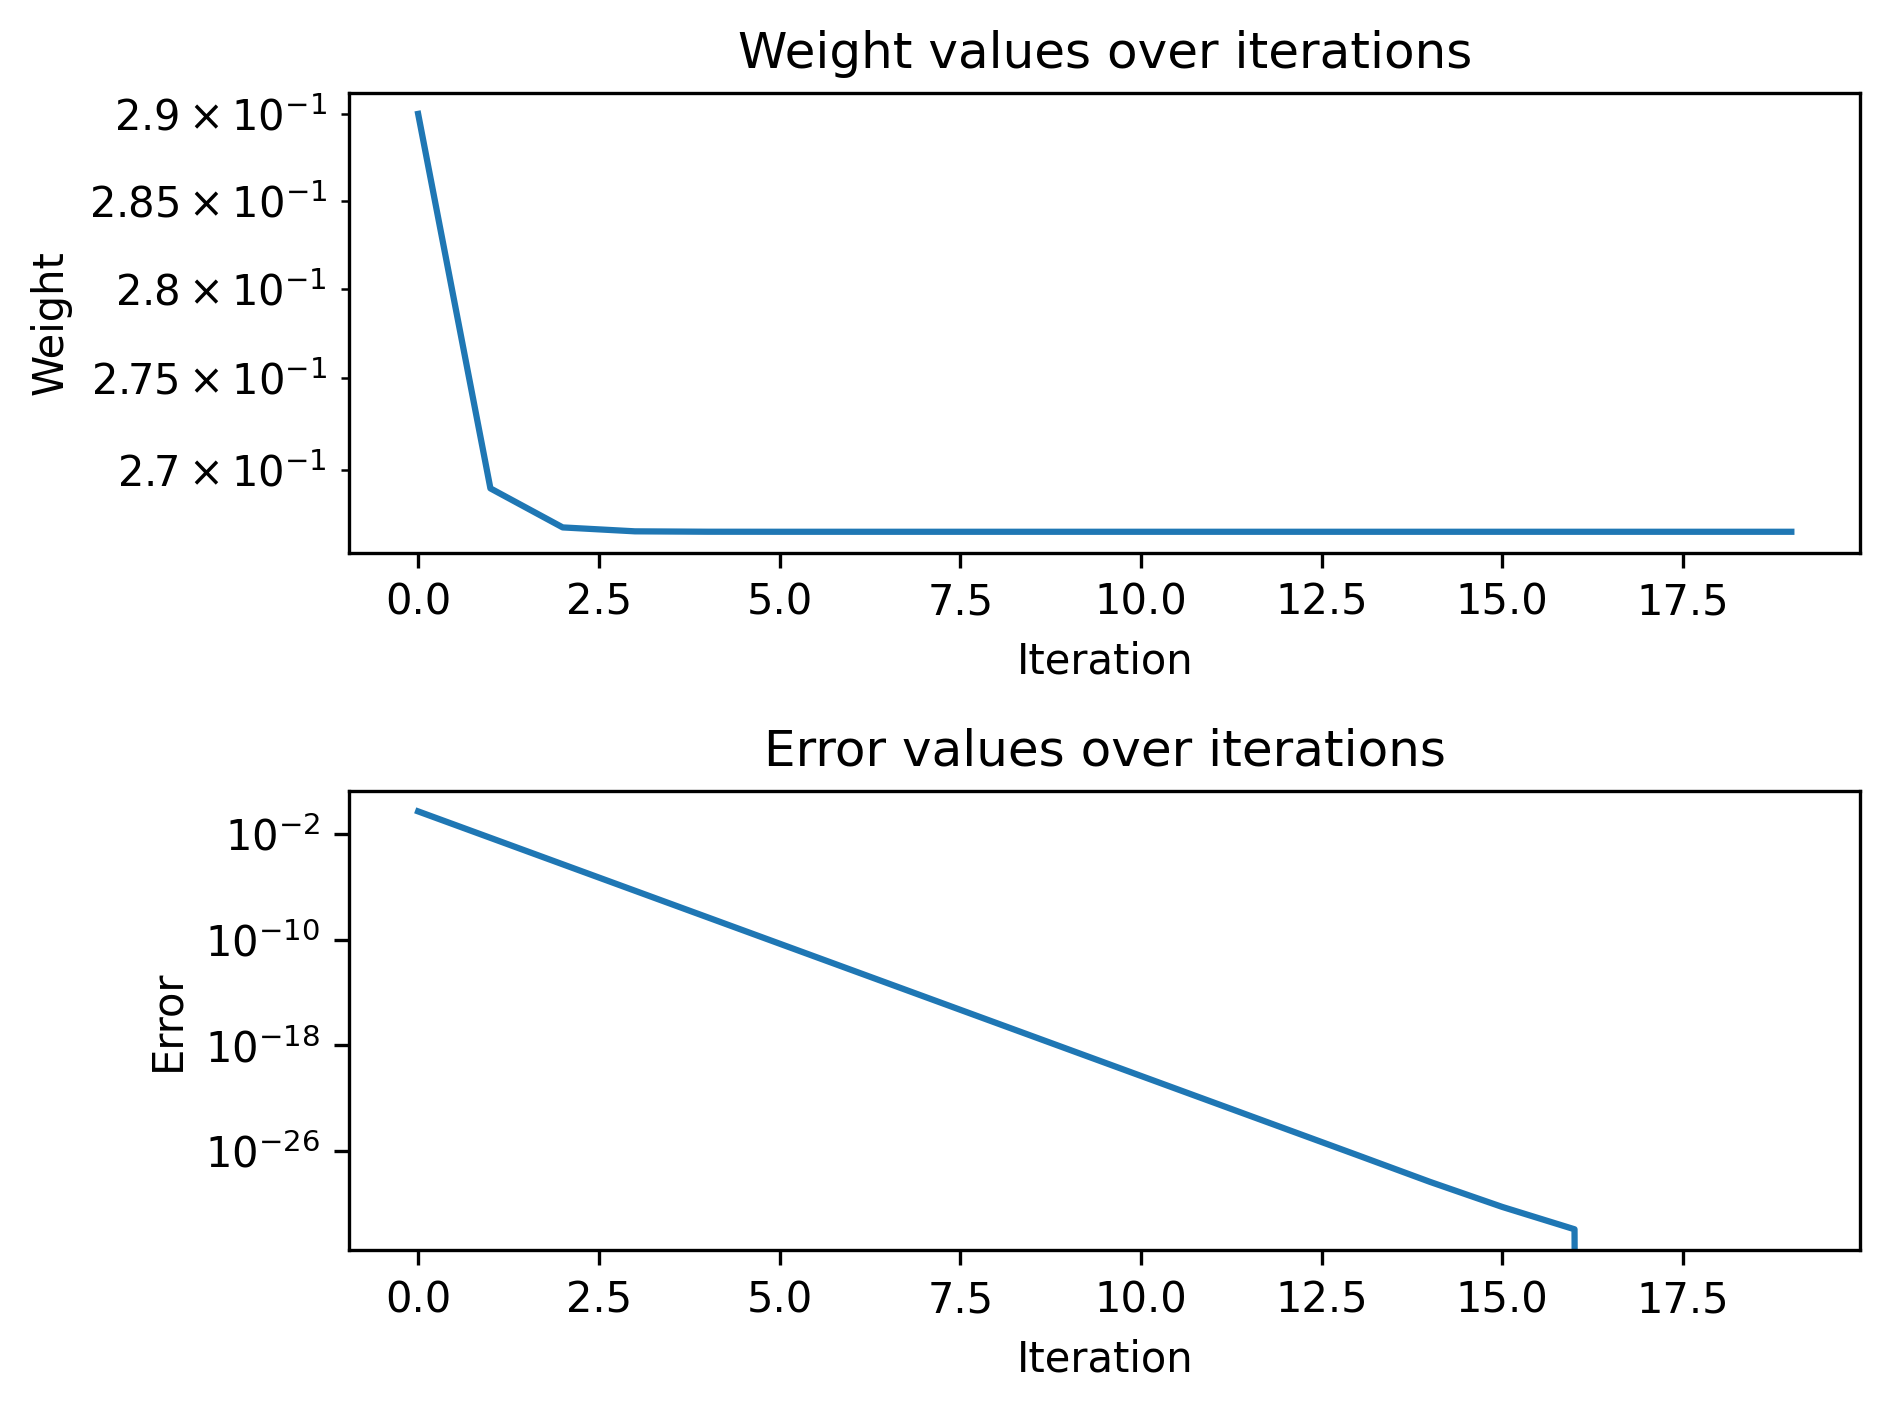

In [7]:
# retry
weight, goal_pred, input_value = (0.5, 0.8, 3)
alpha = 0.1

weights = []
errors = []
for i in range(20):
    error = (weight * input_value - goal_pred)**2
    print(f'error is {error} and weight is {weight}')
    pred = input_value * weight
    derivative = input_value * (pred - goal_pred) ### ! разница прогноза * входное
    weight = weight - alpha * derivative ### ! скорость обучения * производную

    weights.append(weight)
    errors.append(error)

# plot delta vs iteration in upper subplot
# plot error vs iteration in lower subplot
fig, (ax1, ax2) = plt.subplots(2, 1, dpi=300)
# log scale for y-axis
ax1.plot(weights)
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Weight')
ax1.set_title('Weight values over iterations')
ax2.plot(errors)
ax1.set_yscale('log')

ax2.set_xlabel('Iteration')
ax2.set_ylabel('Error')
ax2.set_title('Error values over iterations')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()